# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [62]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.iolib.summary2 import summary_col

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')
data_labels = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator=True).variable_labels()

#  Summary statistics

Inspect the data.

In [2]:
data_labels

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

In [3]:
##Visualize the dataset
data.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012


In [49]:
data.groupby('year').size()

year
68    1375
69    1232
70    1686
71    1851
72    1693
73    1981
75    2141
77    2171
78    1964
80    1847
82    2085
83    1987
85    2085
87    2164
88    2272
dtype: int64

In [4]:
##tabulate college and union status 
data[['collgrad', 'union']].describe()

,collgrad,union
count,28534.000000,19238.000000
mean,0.168045,0.234432
std,0.373913,0.423654
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [63]:
##generate a variable for log hours worked
data = data.assign(ln_hours = lambda x: np.log(x.hours))

In [64]:
##plot log hours against year separately for union and non-union
import seaborn as sns

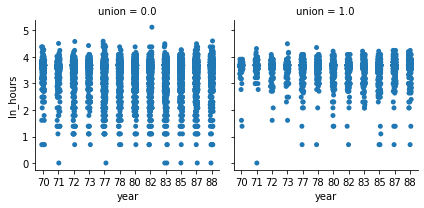

In [65]:
g = sns.FacetGrid(data, col="union")
g.map_dataframe(sns.stripplot, x="year", y="ln_hours")

# Regression: Effect of union status on hours worked

In [70]:
##Regress hours worked against union status and display the results
res = smf.ols("ln_hours ~ union", data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_hours   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     147.5
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           8.08e-34
Time:                        17:06:56   Log-Likelihood:                -9865.7
No. Observations:               19202   AIC:                         1.974e+04
Df Residuals:                   19200   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5270      0.003   1057.147      0.000       3.521       3.534
union          0.0837      0.007     12.145      0.000       0.070       0.097
==============================================================================
Omnibus:                    13206.652   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188252.342
Skew:                          -3.212   Prob(JB):                         0.00
Kurtosis:                      16.930   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
res_df = pd.DataFrame({"Coefficient":res.params,
                       "Standard error":res.HC0_se,
                       "t-value":res.tvalues,
                       "p-value":res.pvalues,
                       "CI lower":res.conf_int()[0],
                       "CI higher":res.conf_int()[1]})
res_df = res_df.round(decimals=3)
res_df.loc['union':]

,Coefficient,Standard error,t-value,p-value,CI lower,CI higher
union,0.084,0.006,12.145,0.0,0.07,0.097


On average, union members work 8.4% more hours per week than non-union members.

#### What is the identification assumption for the coefficient on union to be causal?





The assumption is that there is no confounder, i.e. there is no variable that affects both the treatment and the outcome. For example, education or social status might affect both hours worked and union membership.

In [69]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
res1 = smf.ols("ln_hours ~ union + collgrad", data).fit()
print(summary_col([res,res1]))


               ln_hours I ln_hours II
-------------------------------------
Intercept      3.5270     3.5183     
               (0.0033)   (0.0036)   
R-squared      0.0076     0.0099     
R-squared Adj. 0.0076     0.0098     
collgrad                  0.0486     
                          (0.0074)   
union          0.0837     0.0806     
               (0.0069)   (0.0069)   
Standard errors in parentheses.


The coefficient on union is only slightly smaller when controlling for education and still highly statistically significant. Education does not seem to be a confounder.

In [81]:
## add occupation codes to the regression and compare the results with the previous one
res2 = smf.ols("ln_hours ~ union + collgrad + C(occ_code)", data).fit()
print(summary_col([res,res1,res2], regressor_order=res1.params.index.tolist()))


                    ln_hours I ln_hours II ln_hours III
-------------------------------------------------------
Intercept           3.5270     3.5183      3.5113      
                    (0.0033)   (0.0036)    (0.0095)    
union               0.0837     0.0806      0.0541      
                    (0.0069)   (0.0069)    (0.0069)    
collgrad                       0.0486      0.0299      
                               (0.0074)    (0.0092)    
C(occ_code)[T.10.0]                        0.0426      
                                           (0.0535)    
C(occ_code)[T.11.0]                        0.0452      
                                           (0.0384)    
C(occ_code)[T.9.0]                         -0.1823     
                                           (0.2257)    
C(occ_code)[T.8.0]                         -0.0900     
                                           (0.0120)    
C(occ_code)[T.7.0]                         -0.5488     
                                           (0.0

By adding occupation codes to the regression, the coefficient on union decreases to 0.0541, but it is still statistically significant.

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?


The workers choice of occupation might be influenced by their union status. However, I think it is more likely that occupation choice affects both union status and hours worked, i.e. it is a potential confounder and should be controlled for. By controlling for occupation, we measure the association between union status and hours worked within occupations.

#### What are "good controls" in the dataset in terms of being exogenous to union status?


Race and age are for sure exogenous to union status. It also likely that union status varies along these two variables. It might also be important to include 'year' as a control variable. For example, an exogenous shock to the economy could cause workers to enter (or exit) unions and to change their working hours at the same time.

<AxesSubplot:xlabel='age', ylabel='ln_hours'>

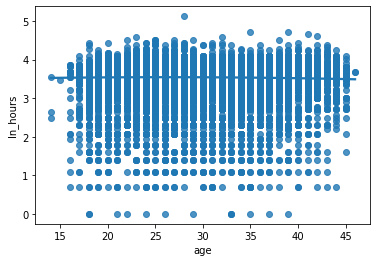

In [101]:
sns.regplot(data = data, x = 'age', y = 'ln_hours', order = 2)

In [117]:
##add these controls to the regression
res3 = smf.ols("ln_hours ~ union + collgrad + race + age + C(occ_code)", data).fit()
res4 = smf.ols("ln_hours ~ union + collgrad + race + age + C(year) + C(occ_code)", data).fit()

In [126]:
res_print = summary_col([res,res1,res2,res3,res4], 
    model_names=['1','2', '3\n(add occupation)', '4\n(add race & age)', '5\n(add year)'],
    regressor_order=['Intercept', 'union', 'collgrad', 'race[T.black]', 'race[T.other]', 'age'], 
    drop_omitted=True)
print(res_print)


                  1        2            3                4             5     
                                 (add occupation) (add race & age) (add year)
-----------------------------------------------------------------------------
Intercept      3.5270   3.5183   3.5113           3.4434           3.6279    
               (0.0033) (0.0036) (0.0095)         (0.0272)         (0.0174)  
union          0.0837   0.0806   0.0541           0.0471           0.0476    
               (0.0069) (0.0069) (0.0069)         (0.0069)         (0.0069)  
collgrad                0.0486   0.0299           0.0383           0.0359    
                        (0.0074) (0.0092)         (0.0091)         (0.0091)  
race[T.black]                                     0.0972           0.0964    
                                                  (0.0065)         (0.0065)  
race[T.other]                                     0.0377           0.0364    
                                                  (0.0270)     

#### How do these change your estimates?


Adding race and age reduces the coefficient of union, but it remains statistically significant. Adding a dummy variable for each year changes the estimates only marginally.

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

[type your comments here, or attach as separate document.]